<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP8/TP8_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 8: Juego del caos

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un aplicativo que permita renderizar el triangulo de Sierpinski mediante el juego del caos.
## Objetivos Específicos
*   Implementar sistemas de funciones iteradas para renderizar fractales
*   Visualizar los resultados

###Problema
Implementar sistemas de funciones iteradas que permita renderizar estructuras fractales. Permitir al usuario interactuar con el aplicativo.

In [1]:
#Lectura de librerías
import matplotlib.pyplot as plt
import numpy as np
!pip install ifsFractals
from ifsFractals import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


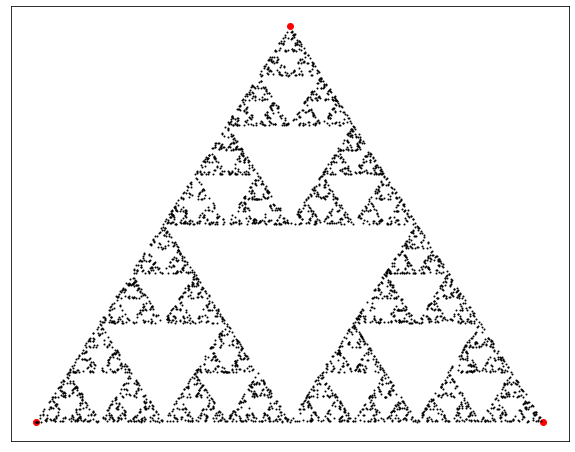

In [10]:
#@title Seleccione la gráfica { run: "auto" }
Option = 'Sierpinski' #@param ["Triangle","Plant","Sierpinski"]
interactions  = 4400 #@param {type:"slider", min:0, max:8000, step:100}

if Option == 'Sierpinski':
  
  vy = (2**2 - (1)**2)**(1/2)
  vx = [[0,0], [2, 0], [1, vy]]

  aleatorio = np.random.randint(0, 3, interactions)

  fig = plt.figure(figsize = (10, 8))
  puntos, = plt.plot([], [], 'o', ms=1)

  #Dibuja los vértices del triángulo
  plt.plot([0, 2, 1], [0, 0, vy], 'o', color='red')

  #Semilla
  x = [-0, -0]
  plt.plot(x[0], x[1], 'o', color='black', ms=1)

  for i in range(interactions):
      plt.plot(x[0], x[1], 'o', color='black', ms=1)
      x[0] = (vx[aleatorio[i]][0] + x[0]) / 2
      x[1] = (vx[aleatorio[i]][1] + x[1]) / 2

  plt.xticks([])
  plt.yticks([])
  plt.show()

if Option == 'Triangle':
  T1 = Scale(1/2)
  T2 = Translate(0.5, 0) @ Scale(1/2)
  T3 = Translate(0, 0.5) @ Scale(1/2)

  T = [T1, T2, T3]

  Box = np.array([ [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1],
                  [1/8, 1/8, 1], [1/8-1/16, 1/8+1/16, 1] ]).T

  figures = generate_figures(7, [Box], T)
  plot_figures(figures, size=10, width=.8, color='black')

if Option == 'Plant':

  T1 = Translate(0.30, .5) @ Scale(1/2) @ np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., 1.]]) @ Rotate(-np.pi/4)
  T2 = Translate(.5, .43) @ Scale(1/4) @ np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., 1.]]) @ ShearX(-1/8)
  T3 = Translate(-0.08, 0.25) @ Rotate(np.pi/11) @ ScaleXY(2/3, 1/150) @ ShearX(1/15) 

  T = [T1, T2, T3]

  Box = np.array([ [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1],
                  [1/8, 1/8, 1], [1/8-1/16, 1/8+1/16, 1] ]).T

  figures = generate_figures(7, [Box], T)
  plot_figures(figures, size=10, width=.8, color='black')

###Análisis de resultados

*   El aplicativo desarrollado satisface con los objetivos del trabajo práctico, el mismo permite el renderizado del triángulo de Sierpinski  aplicando el sistema de funciones iteradas (IFS).
*   El usuario puede interactuar con el aplicativo mediante scrollbars, donde se permite seleccionar el número de interacciones en el renderizado.